In [1]:
import os

# Define the project root directory (assuming the notebook is in the root directory)
project_root = os.getcwd()  # Gets the current working directory, which is the root in this case

# Define the relative path to the data folder
data_folder = os.path.join(project_root, 'physionet.org', 'files', 'mitdb', '1.0.0')

# Specify the record number
record_number = '100'  # Change this to the desired record number

# Construct the full path to the record
record_path = os.path.join(data_folder, record_number)


# print record_path
print(record_path)


/home/franco/Dropbox/AA_Fra_Rosnati/B_Education/AA_University/AA_PoliMi/AA_Ing/01_Magistrale/HPC_engineering/1_sem_HPC/NAML/NAML_project/NAML_ECG_compressor/physionet.org/files/mitdb/1.0.0/100


In [2]:
import wfdb

# Load the signal and annotations
record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_name=record_path, extension='atr', shift_samps=True)


In [3]:
import pandas as pd
df = record.to_dataframe()

print(df.head(15))
print("\n")
print(df.dtypes)

                            MLII     V5
0 days 00:00:00           -0.145 -0.065
0 days 00:00:00.002777777 -0.145 -0.065
0 days 00:00:00.005555554 -0.145 -0.065
0 days 00:00:00.008333331 -0.145 -0.065
0 days 00:00:00.011111108 -0.145 -0.065
0 days 00:00:00.013888885 -0.145 -0.065
0 days 00:00:00.016666662 -0.145 -0.065
0 days 00:00:00.019444439 -0.145 -0.065
0 days 00:00:00.022222216 -0.120 -0.080
0 days 00:00:00.024999993 -0.135 -0.080
0 days 00:00:00.027777770 -0.145 -0.085
0 days 00:00:00.030555547 -0.150 -0.085
0 days 00:00:00.033333324 -0.160 -0.075
0 days 00:00:00.036111101 -0.155 -0.070
0 days 00:00:00.038888878 -0.160 -0.070


MLII    float64
V5      float64
dtype: object


In [4]:
## Choose portion of record to work with
# REMINDER: sampling frequency is 360 Hz

# starting sample
start_sample = 750
# duration in seconds
num_samples = 1024

## Extract that portion of the signal only for the MLII samples
# Assuming you have already sliced the DataFrame to get the portion you're interested in

# Slicing the DataFrame for the MLII column
x = df['MLII'].iloc[start_sample:start_sample + num_samples]

# Length of the original signal
n = x.shape[0]

print(f'x.shape: {x.shape}')

x.shape: (1024,)


/home/franco/Dropbox/AA_Fra_Rosnati/B_Education/AA_University/AA_PoliMi/AA_Ing/01_Magistrale/HPC_engineering/1_sem_HPC/NAML/NAML_project/NAML_ECG_compressor/.namlVenv/lib/python3.8/site-packages/sklearn/linear_model/_omp.py:428: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(


Mean Squared Error (MSE) between original signal and reconstructed signal: 0.3139171618013316


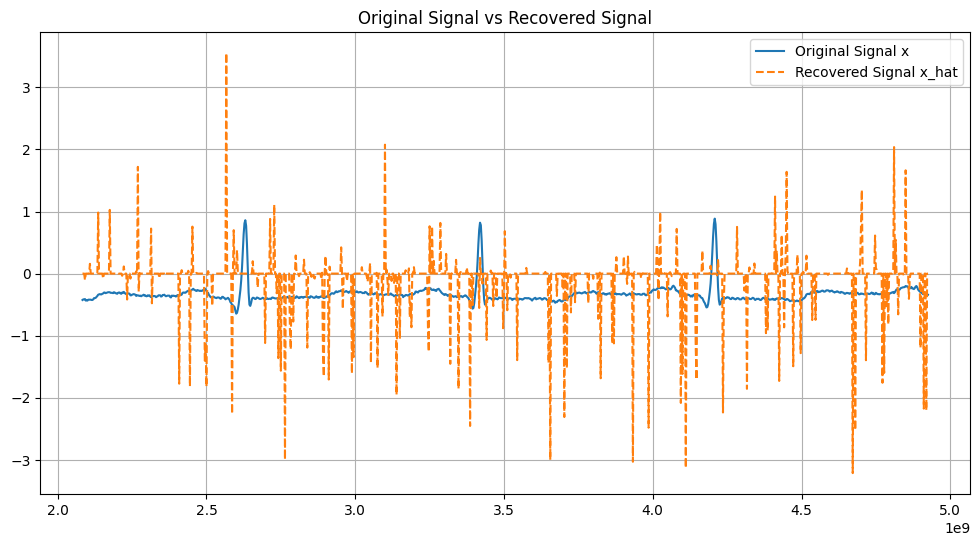

In [5]:
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Generate a random matrix phi with values -1 and 1
m = n // 4  # Length of y, 1/4 of the length of x
phi = np.random.choice([-1, 1], size=(m, n))

# Step 3: Compute the compressed measurements y
y = phi @ x

# Step 4: Recover the signal x_hat using Orthogonal Matching Pursuit (OMP)
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n)
omp.fit(phi, y)
x_hat = omp.coef_
x_hat = pd.Series(x_hat, index=x.index)

# Step 5: Evaluate the reconstruction quality
mse = mean_squared_error(x, x_hat)
print(f"Mean Squared Error (MSE) between original signal and reconstructed signal: {mse}")

# Plot the original signal and the recovered signal
plt.figure(figsize=(12, 6))
plt.plot(x, label='Original Signal x')
plt.plot(x_hat, label='Recovered Signal x_hat', linestyle='--')
plt.title('Original Signal vs Recovered Signal')
plt.legend()
plt.grid(True)
plt.show()


/home/franco/Dropbox/AA_Fra_Rosnati/B_Education/AA_University/AA_PoliMi/AA_Ing/01_Magistrale/HPC_engineering/1_sem_HPC/NAML/NAML_project/NAML_ECG_compressor/.namlVenv/lib/python3.8/site-packages/sklearn/linear_model/_omp.py:428: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(



x
0 days 00:00:02.083332750   -0.425
0 days 00:00:02.086110527   -0.415
0 days 00:00:02.088888304   -0.415
0 days 00:00:02.091666081   -0.410
0 days 00:00:02.094443858   -0.435
                             ...  
0 days 00:00:04.913887513   -0.320
0 days 00:00:04.916665290   -0.330
0 days 00:00:04.919443067   -0.330
0 days 00:00:04.922220844   -0.335
0 days 00:00:04.924998621   -0.340
Freq: 2777777N, Name: MLII, Length: 1024, dtype: float64

x_hat
0 days 00:00:02.083332750   -10.605847
0 days 00:00:02.086110527     0.000000
0 days 00:00:02.088888304     0.000000
0 days 00:00:02.091666081     0.000000
0 days 00:00:02.094443858     0.300784
                               ...    
0 days 00:00:04.913887513     0.000000
0 days 00:00:04.916665290     0.000000
0 days 00:00:04.919443067     0.007335
0 days 00:00:04.922220844    -0.028732
0 days 00:00:04.924998621    -0.031109
Freq: 2777777N, Length: 1024, dtype: float64
Mean Squared Error (MSE) between original signal and reconstructed signal:

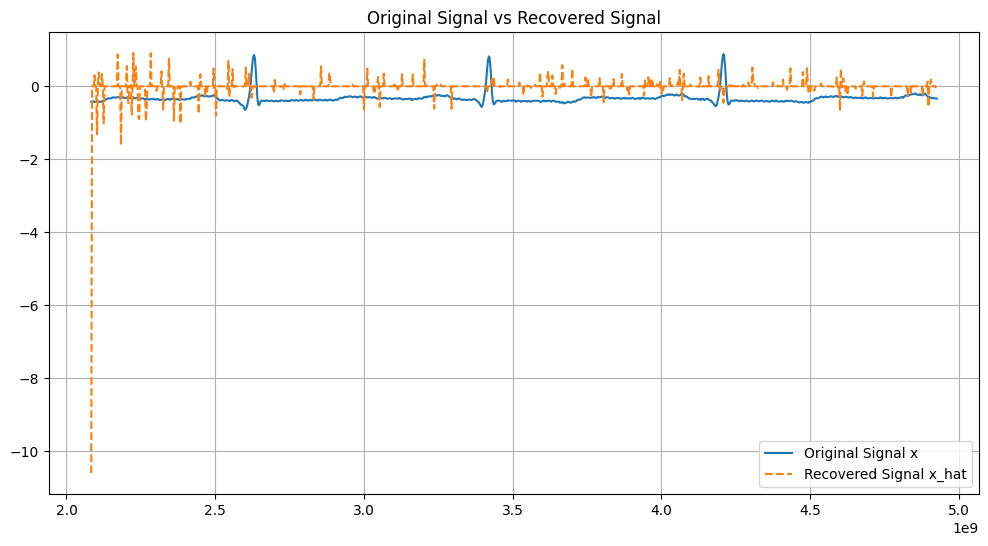

In [6]:
import numpy as np
from scipy.fftpack import dct, idct
from pywt import wavedec, waverec

def create_psi_matrix(n, transform_type='dct', wavelet='db4', level=None, custom_psi=None):
    """
    Constructs the Psi matrix based on the specified transform type or a custom dictionary.

    Parameters:
    - n (int): The dimension of the Psi matrix (n x n).
    - transform_type (str): The type of transform to use. Options are 'dct', 'wavelet', 'fourier'.
    - wavelet (str): The type of wavelet to use for DWT. Default is 'db4'.
    - level (int or None): The decomposition level (used only for wavelet).
    - custom_psi (numpy.ndarray): A custom dictionary matrix of shape (n, n).

    Returns:
    - numpy.ndarray: The Psi matrix of shape (n, n).
    """
    if custom_psi is not None:
        return custom_psi

    if transform_type == 'dct':
        # DCT basis
        return dct(np.eye(n), norm='ortho')

    elif transform_type == 'wavelet':
        # Wavelet basis
        psi = np.zeros((n, n))
        for ii in range(n):
            ek = np.zeros(n)
            ek[ii] = 1
            coeffs = wavedec(ek, wavelet, level=level)
            psi_row = waverec(coeffs, wavelet)[:n]
            psi[ii, :] = psi_row
        return psi

    elif transform_type == 'fourier':
        # Fourier basis
        return np.fft.fft(np.eye(n)).real

    else:
        raise ValueError("Invalid transform_type. Choose 'dct', 'wavelet', 'fourier', or provide a custom_psi.")


import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Step 2: Generate a random matrix phi with values -1 and 1
m = n // 4  # Length of y, 1/4 of the length of x
phi = np.random.choice([-1, 1], size=(m, n))

# Step 3: Compute the compressed measurements y
y = phi @ x

# Step 4: Recover the signal x_hat using Orthogonal Matching Pursuit (OMP)
psi = create_psi_matrix(n, transform_type='dct')
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n)
omp.fit(phi @ psi, y)
x_hat = omp.coef_
x_hat = pd.Series(x_hat, index=x.index)

# print the two signals
print('\nx')
print(x)
print('\nx_hat')
print(x_hat)

# Step 5: Evaluate the reconstruction quality
mse = mean_squared_error(x, x_hat)
print(f"Mean Squared Error (MSE) between original signal and reconstructed signal: {mse}")

# Plot the original signal and the recovered signal
plt.figure(figsize=(12, 6))
plt.plot(x, label='Original Signal x')
plt.plot(x_hat, label='Recovered Signal x_hat', linestyle='--')
plt.title('Original Signal vs Recovered Signal')
plt.legend()
plt.grid(True)
plt.show()
